In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

In [142]:
# paramètres du problème
mu, alpha = 0.05, 0.1
sigma = 0.3
sigma2 = sigma**2
S0 = 1
h = 0.05
T = 1
M, N = int(T/h), 1000

In [163]:
def get_IC (t) :
    """ get IC """    
    return (S0 * np.exp(
                    sigma * math.sqrt(t) * np.array([norm.ppf(alpha/2), norm.ppf(1 - alpha/2)]) + 
                    (mu - sigma2/2) * t))
def get_S_t () :
    """ retourne une liste de S(t) ; t allant de 1 à M. et intervalle de confiance IC """
    Z = np.random.rand(M)
    SM =[
        S0 * np.exp((mu - sigma2/2) * t + sigma * np.sqrt(t) * Z[t])
        for t in range(M)]

    IC = np.array([get_IC(t) for t in range(M)])
    return SM, IC

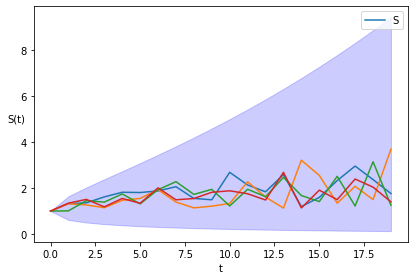

In [167]:
# affichage de 5 échantillons d'évolution d'actif boursier.
fig, ax = plt.subplots()
for i in range(4) :
    ax.plot(get_S_t()[0])
plt.legend("S")
plt.ylabel("S(t)", rotation=0)
plt.xlabel("t")
plt.tight_layout()
ax.fill_between(range(M), get_S_t()[1][:, 0], get_S_t()[1][:, 1], color='b', alpha=.2)
plt.savefig("échantillon.png")

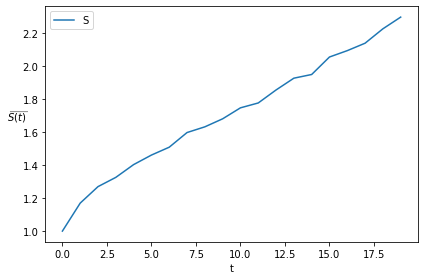

In [169]:
# génération d'une liste de N échantillons S(t) ; t allant de 1 à M
SMN = np.array([get_S_t()[0] for n in range(N)])
SMN_mean = np.mean(SMN, axis=0)

# affichage de l'évolution moyenne de l'actif boursier pour tout t allant de 1 à M (N éléments)
plt.plot(SMN_mean)
plt.legend("S")
plt.ylabel("$\widebar{S(t)}$", rotation=0)
plt.xlabel("t")
plt.tight_layout()
plt.savefig("moyenne.png")

In [170]:
# affichage du gain moyen de l'actif boursier de 1 à M (N éléments)
print(f"gain moyen: {(SMN[:, -1] - S0).mean():.2f}")

gain moyen: 1.30
